In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline


In [2]:
data = pd.read_csv('listings_model_no_outliers.csv')
data.head()


/tmp/ipython-input-2408935645.py:2: DtypeWarning: Columns (21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('listings_model_no_outliers.csv')


,id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,...,property_type_Shepherd’s hut,property_type_Tent,property_type_Tiny home,property_type_Tower,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_No,host_is_superhost_Yes,instant_bookable_Yes
0,13913,51.56861,-0.11270,1,1.0,1.0,1.0,70.0,1,29,...,False,False,False,False,False,True,False,False,True,False
1,15400,51.48780,-0.16813,2,1.0,1.0,1.0,149.0,4,30,...,False,False,False,False,False,False,False,True,False,False
2,24328,51.47072,-0.16266,2,1.0,1.0,2.0,135.0,7,1125,...,False,False,False,False,False,False,False,True,False,False
3,36274,51.52322,-0.06979,4,1.0,1.0,0.0,210.0,5,1125,...,False,False,False,False,False,False,False,True,False,True
4,38995,51.47860,-0.06114,2,1.0,1.0,1.0,49.0,1,8,...,False,False,False,False,False,True,False,False,True,False


In [14]:
print(data.shape)

print(data.dtypes)

print(data.isnull().sum())


(4882, 149)
id                         int64
latitude                 float64
longitude                float64
accommodates               int64
bathrooms                float64
                          ...   
host_is_superhost_No      object
host_is_superhost_Yes     object
instant_bookable_Yes      object
host_is_superhost_bin     object
instant_bookable_bin      object
Length: 149, dtype: object
id                       0
latitude                 0
longitude                0
accommodates             0
bathrooms                0
                        ..
host_is_superhost_No     1
host_is_superhost_Yes    1
instant_bookable_Yes     1
host_is_superhost_bin    1
instant_bookable_bin     1
Length: 149, dtype: int64


In [8]:
data.columns


Index(['id', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price', 'minimum_nights', 'maximum_nights',
       ...
       'property_type_Shepherd’s hut', 'property_type_Tent',
       'property_type_Tiny home', 'property_type_Tower',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room', 'host_is_superhost_No',
       'host_is_superhost_Yes', 'instant_bookable_Yes'],
      dtype='object', length=147)

In [9]:
# Cambiar variables binarias a 0/1

data['host_is_superhost_bin'] = data['host_is_superhost_Yes']

data['instant_bookable_bin'] = data['instant_bookable_Yes']

data[['host_is_superhost_No', 'host_is_superhost_Yes',
      'host_is_superhost_bin',
      'instant_bookable_Yes', 'instant_bookable_bin']].head()


,host_is_superhost_No,host_is_superhost_Yes,host_is_superhost_bin,instant_bookable_Yes,instant_bookable_bin
0,False,True,True,False,False
1,True,False,False,False,False
2,True,False,False,False,False
3,True,False,False,True,True
4,False,True,True,False,False


MODELO 1 – REGRESIÓN LINEAL

In [32]:
# Variables explicativas numéricas para la regresión
features_reg = [
    'accommodates',
    'bedrooms',
    'beds',
    'bathrooms',
    'minimum_nights',
    'number_of_reviews',
    'review_scores_rating',
    'host_is_superhost_bin',
    'instant_bookable_bin'
]

#quitar NaN solo en columnas numéricas
for col in features_reg:
    if pd.api.types.is_numeric_dtype(data[col]):
        mediana = data[col].median()
        data[col].fillna(mediana, inplace=True)

# NaN en price
if data['price'].isnull().sum() > 0:
    data['price'].fillna(data['price'].median(), inplace=True)

# Construcción de matrices X y y
X = data[features_reg]
y = data['price']


X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.7,
    test_size=0.3,
    random_state=42
)

X_train.head()


/tmp/ipython-input-2073486731.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(mediana, inplace=True)


,accommodates,bedrooms,beds,bathrooms,minimum_nights,number_of_reviews,review_scores_rating,host_is_superhost_bin,instant_bookable_bin
4182,1,1.0,2.0,1.0,7,0,4.83,False,False
2534,2,1.0,2.0,1.0,7,53,4.96,True,False
4303,2,1.0,2.0,1.0,3,5,4.40,False,False
1071,1,1.0,2.0,1.0,1,1,5.00,False,False
2905,2,1.0,2.0,1.0,1,0,4.83,False,False


In [33]:
modelo_reg = LinearRegression()
modelo_reg.fit(X_train, y_train)

# Predicciones
y_train_pred = modelo_reg.predict(X_train)
y_test_pred = modelo_reg.predict(X_test)

# Métricas
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print('MSE entrenamiento:', mse_train)
print('MSE prueba:', mse_test)
print('R^2 entrenamiento:', r2_train)
print('R^2 prueba:', r2_test)


MSE entrenamiento: 623.3706396867027
MSE prueba: 655.4606983803312
R^2 entrenamiento: 0.3477823252670861
R^2 prueba: 0.3437054711223487


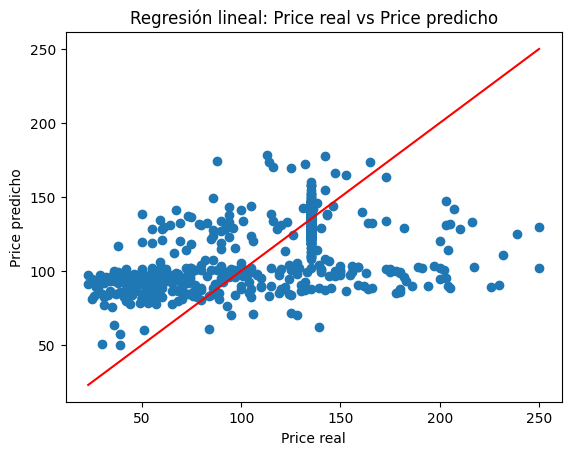

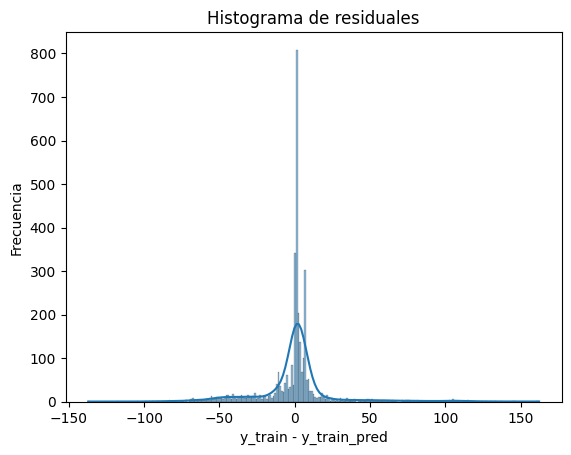

In [34]:
# Gráfico Price real vs Price predejido
plt.scatter(y_test, y_test_pred)
plt.xlabel('Price real')
plt.ylabel('Price predicho')
plt.title('Regresión lineal: Price real vs Price predicho')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red')
plt.show()

# Histograma de errores (residuales) en entrenamiento
residuales = y_train - y_train_pred

sns.histplot(residuales, kde=True)
plt.title('Histograma de residuales')
plt.xlabel('y_train - y_train_pred')
plt.ylabel('Frecuencia')
plt.show()


MODELO 2 – REGRESIÓN LOGÍSTICA

In [35]:
# Umbral top 25% de calificación
umbral = data['review_scores_rating'].quantile(0.75)
print("Umbral de recomendación (Q3):", umbral)

# Variable objetivo  (1 = recomendado, 0 = no recomendado)
data['recommended'] = (data['review_scores_rating'] >= umbral).astype(int)
print("\nDistribución de recommended:")
print(data['recommended'].value_counts())


features_cls = [
    'accommodates',
    'bedrooms',
    'beds',
    'bathrooms',
    'minimum_nights',
    'number_of_reviews',
    'review_scores_rating',
    'host_is_superhost_bin',
    'instant_bookable_bin'
]

#NaN en columnas numéricas
for col in features_cls:
    if pd.api.types.is_numeric_dtype(data[col]):
        mediana = data[col].median()
        data[col].fillna(mediana, inplace=True)

# Matrices X y y
X_cls = data[features_cls]
y_cls = data['recommended']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_cls,
    y_cls,
    test_size=0.3,
    random_state=42
)

print("\nClases en y_train_c:", np.unique(y_train_c))
print("Clases en y_test_c :", np.unique(y_test_c))


Umbral de recomendación (Q3): 4.91

Distribución de recommended:
recommended
0    3659
1    1223
Name: count, dtype: int64

Clases en y_train_c: [0 1]
Clases en y_test_c : [0 1]


/tmp/ipython-input-2387830961.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(mediana, inplace=True)


In [36]:
columnas_a_escalar = [
    'accommodates',
    'bedrooms',
    'beds',
    'bathrooms',
    'minimum_nights',
    'number_of_reviews',
    'review_scores_rating'
]

preprocesamiento = ColumnTransformer(
    transformers=[
        ('scaler', MinMaxScaler(), columnas_a_escalar)
    ],
    remainder='passthrough'
)

pipeline = Pipeline([
    ('preprocesamiento', preprocesamiento),
    ('logreg', LogisticRegression(max_iter=200))
])

pipeline.fit(X_train_c, y_train_c)
y_pred_c = pipeline.predict(X_test_c)

accuracy = accuracy_score(y_test_c, y_pred_c)
print('Precisión del modelo de clasificación:', accuracy)

print('\nReporte de clasificación:')
print(classification_report(y_test_c, y_pred_c))

cf = confusion_matrix(y_test_c, y_pred_c)
print('\nMatriz de confusión:')
print(cf)


Precisión del modelo de clasificación: 0.9883959044368601

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1104
           1       0.99      0.96      0.98       361

    accuracy                           0.99      1465
   macro avg       0.99      0.98      0.98      1465
weighted avg       0.99      0.99      0.99      1465


Matriz de confusión:
[[1101    3]
 [  14  347]]
